To answer the question **"Are certain product categories more popular with specific genders?"**, we performed a clustering analysis on retail transaction data. By leveraging hierarchical clustering and PCA, we identified distinct customer groups based on gender, product preferences, and spending patterns. 


Cluster Gender-Product Category Distribution:
Product Category               Beauty  Clothing  Electronics
Hierarchical Cluster Gender                                 
0                    Female  0.491573  0.508427          0.0
1                    Male    0.000000  1.000000          0.0
2                    Female  0.000000  0.000000          1.0
3                    Male    0.000000  0.000000          1.0
4                    Male    1.000000  0.000000          0.0


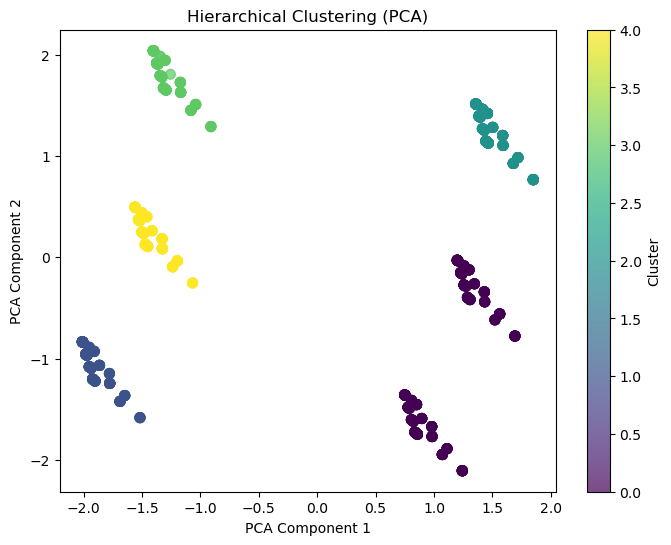

In [6]:
# Apply Agglomerative Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters_hierarchical = hierarchical_clustering.fit_predict(normalized_data)

# Add cluster labels to the data
data_for_clustering = data_for_clustering.copy()
data_for_clustering['Hierarchical Cluster'] = clusters_hierarchical

# Analyze the proportion of Gender and Product Category within each cluster
cluster_gender_category_summary = data_for_clustering.groupby(
    ['Hierarchical Cluster', 'Gender', 'Product Category']
).size().unstack().fillna(0)

# Normalize proportions within each cluster for comparison
cluster_gender_category_summary = cluster_gender_category_summary.div(
    cluster_gender_category_summary.sum(axis=1), axis=0
)

# Display the cluster summary
print("Cluster Gender-Product Category Distribution:")
print(cluster_gender_category_summary)

# Visualize the hierarchical clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_hierarchical, cmap='viridis', s=50, alpha=0.7)
plt.title("Hierarchical Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


### Key Insights from the PCA Plot
1. **Spatial Distribution**:
   - The top and bottom separation roughly corresponds to differences in product category preferences.
   - Left vs. right positioning seems to correlate with gender and spending patterns.

2. **Distinct Shopping Behaviors**:
   - The clear separation between clusters reflects the unique purchasing preferences of each group.
   - These insights can be used to target specific customer groups effectively.

In [7]:
# Get cluster characteristics
data_for_clustering['Hierarchical Cluster'] = clusters_hierarchical

# Analyze average metrics for each cluster
cluster_profiles = data_for_clustering.groupby('Hierarchical Cluster').agg({
    'Quantity': 'mean',
    'Total Amount': 'mean'
}).round(2)

# Get the distribution of Gender and Product Category in each cluster
gender_dist = pd.crosstab(data_for_clustering['Hierarchical Cluster'], 
                         data_for_clustering['Gender'], 
                         normalize='index') * 100

product_dist = pd.crosstab(data_for_clustering['Hierarchical Cluster'], 
                          data_for_clustering['Product Category'], 
                          normalize='index') * 100

print("Cluster Profiles:")
print("\nAverage Metrics per Cluster:")
print(cluster_profiles)
print("\nGender Distribution (%):")
print(gender_dist.round(2))
print("\nTop Product Categories per Cluster (%):")
print(product_dist.round(2))


Cluster Profiles:

Average Metrics per Cluster:
                      Quantity  Total Amount
Hierarchical Cluster                        
0                         2.54        489.44
1                         2.48        385.62
2                         2.44        507.86
3                         2.54        388.83
4                         2.56        449.24

Gender Distribution (%):
Gender                Female   Male
Hierarchical Cluster               
0                      100.0    0.0
1                        0.0  100.0
2                      100.0    0.0
3                        0.0  100.0
4                        0.0  100.0

Top Product Categories per Cluster (%):
Product Category      Beauty  Clothing  Electronics
Hierarchical Cluster                               
0                      49.16     50.84          0.0
1                       0.00    100.00          0.0
2                       0.00      0.00        100.0
3                       0.00      0.00        100.0
4     



## Cluster Analysis Summary

Looking at the PCA plot, the clusters can be matched with their respective colors and descriptions as follows:

Cluster 0: Female shoppers mixing Beauty and Clothing (Purple - Bottom Right)
- Demographics: 100% Female customers
- Preferences:
  - 49.16% Beauty
  - 50.84% Clothing
- Average Transaction: $489.44

Cluster 1: Male Clothing Specialists (Dark Blue - Bottom Left)
- Demographics: 100% Male customers
- Preferences:
  - 100% Clothing purchases
- Average Transaction: $385.62

Cluster 2: Female Electronics Enthusiasts (Yellow - Center Left)
- Demographics: 100% Female customers
- Preferences:
  - 100% Electronics purchases
- Average Transaction: $507.86 (Highest among clusters)

Cluster 3: Male Electronics Shoppers (Green - Top Left)
- Demographics: 100% Male customers
- Preferences:
  - 100% Electronics purchases
- Average Transaction: $388.83

Cluster 4: Male Beauty Shoppers (Teal - Top Right)
- Demographics: 100% Male customers
- Preferences:
  - 100% Beauty purchases
- Average Transaction: $449.24


---


## Practical Applications for Businesses

The clustering analysis reveals distinct customer groups based on their **gender**, **product preferences**, and **spending patterns**. Businesses can leverage these insights in various ways to improve marketing, operations, and customer experience.

1. Personalized Marketing Campaigns
- Cluster 0 (Female, Beauty & Clothing):
  - Create cross-promotional campaigns targeting females who purchase both Beauty and Clothing.
  - Bundle products from these categories to encourage higher cart value.
- Cluster 1 (Male, Clothing Specialists):
  - Focus advertisements on Clothing targeted exclusively at male shoppers.
  - Highlight seasonal trends, discounts, or loyalty programs for men's apparel.
- Cluster 2 (Female, Electronics Enthusiasts):
  - Promote tech products with messaging that resonates with female customers (e.g., aesthetics, practical use).
  - Offer financing options or free tech support to attract more purchases.
- Cluster 3 (Male, Electronics  Shoppers):
  - Push high-tech gadgets, gaming equipment, or other electronics for male shoppers.
  - Highlight technical specifications and premium features in campaigns.
- Cluster 4 (Male, Beauty Shoppers):
  - Launch targeted campaigns emphasizing men's grooming products.
  - Use social media influencers to promote grooming routines and relevant products.

2. Product Line Optimization
- Tailor inventory to meet the preferences of specific clusters:
  - Increase stock for Beauty products where male demand exists (Cluster 4).
  - Ensure adequate inventory of Electronics for both genders (Clusters 2 and 3).
- Introduce new product lines based on cluster demands:
  - Gender-neutral product offerings for electronics.
  - More exclusive clothing designs targeting men.

3. Pricing and Promotion Strategies
- Use transaction values from each cluster to set optimal pricing:
  - For Cluster 2 (Female Electronics Enthusiasts), prioritize high-margin products since they have the highest average spend.
  - Offer discounts for Cluster 1 (Male Clothing Specialists) to incentivize more frequent purchases.
- Design promotions tailored to specific groups:
  - Buy-One-Get-One offers for Beauty and Clothing for females.
  - Holiday promotions on grooming kits for Cluster 4 (Male Beauty Shoppers).

4. Store Layout and Product Placement
- Physical Stores:
  - Group Beauty and Clothing sections close together to cater to Cluster 0.
  - Create a dedicated section for Electronics with gender-neutral branding for Clusters 2 and 3.
- E-commerce:
  - Personalize product recommendations:
    - Suggest Beauty and Clothing together for female shoppers.
    - Show grooming products prominently for male shoppers in Cluster 4.

5. Customer Retention and Loyalty Programs
- Tailor loyalty programs to specific clusters:
  - Offer points or rewards for repeat purchases in Beauty and Clothing for Cluster 0.
  - Provide exclusive early access to new Electronics for Clusters 2 and 3.
- Use targeted communication to engage specific customer segments:
  - Personalized emails for male Beauty shoppers (Cluster 4) with exclusive grooming product offers.

6. Regional or Demographic Expansion
- Using geographic data, analyze where each cluster is concentrated.
- Use insights to expand product categories in underrepresented regions or adjust marketing strategies regionally.

7. Competitive Advantage
- Understand niche demands, such as male Beauty shoppers or female Electronics enthusiasts, and cater to these segments more effectively than competitors.
- Differentiate product offerings by tapping into clusters with specific needs that competitors may overlook.

### Summary
The clustering insights can help businesses:
1. Optimize inventory** based on demand.
2. Design highly targeted marketing campaigns for each segment.
3. Enhance customer loyalty through personalized experiences.
4. Improve profitability by focusing on high-value customer groups like female Electronics buyers.